# NLP PROJECT

## EMAILS

## Business Objective

### Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favourtism and hate in the gender or culture, in today’s world so dominated by email no organization is immune to these hate emails.
The goal of the project is to identify such emails in the given day based on the above inappropriate content.

### Data Set Details

The dataset contains around 20 lakh emails generated by employees of an organization.

## Import Libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
#from wordcloud import WordCloud
%matplotlib inline
import string
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
#from textblob import TextBlob

## Load The Data

In [4]:
import csv
email = pd.read_csv("emails")

In [5]:
email

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


# EDA

In [4]:
email.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [5]:
email.tail()

,Unnamed: 0,filename,Message-ID,content,Class
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive
48075,48075,campbell-l/notes_inbox/137.,<10677824.1075857876692.JavaMail.evans@thyme>,---------------------- Forwarded by Tamara Jae...,Non Abusive


In [6]:
email.columns

Index(['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [7]:
email.shape

(48076, 5)

In [8]:
email.describe()

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


In [9]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [10]:
email.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [11]:
email.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

In [12]:
email.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48071    False
48072    False
48073    False
48074    False
48075    False
Length: 48076, dtype: bool

In [13]:
email.duplicated().value_counts()

False    48076
dtype: int64

In [14]:
email["Class"].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

In [15]:
email["filename"].value_counts

<bound method IndexOpsMixin.value_counts of 0            arnold-j/_sent_mail/34.
1           arnold-j/_sent_mail/517.
2           arnold-j/_sent_mail/743.
3           arnold-j/_sent_mail/766.
4           arnold-j/_sent_mail/797.
                    ...             
48071    campbell-l/notes_inbox/133.
48072    campbell-l/notes_inbox/134.
48073    campbell-l/notes_inbox/135.
48074    campbell-l/notes_inbox/136.
48075    campbell-l/notes_inbox/137.
Name: filename, Length: 48076, dtype: object>

In [16]:
email["Message-ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0        <15267340.1075857594923.JavaMail.evans@thyme>
1        <15539583.1075857652152.JavaMail.evans@thyme>
2         <4339799.1075857657711.JavaMail.evans@thyme>
3        <25574783.1075857658215.JavaMail.evans@thyme>
4        <19506151.1075857658895.JavaMail.evans@thyme>
                             ...                      
48071     <6503484.1075857876489.JavaMail.evans@thyme>
48072    <17277180.1075857876513.JavaMail.evans@thyme>
48073    <31066400.1075857876537.JavaMail.evans@thyme>
48074    <26024436.1075857876659.JavaMail.evans@thyme>
48075    <10677824.1075857876692.JavaMail.evans@thyme>
Name: Message-ID, Length: 48076, dtype: object>

### After completing EDA we get an overview about the data. SO column name as "filename" and "Message-ID" does not have more contribution to the data. so in data cleaning part we will drop them

In [6]:
# Creating a csv file 
email.to_csv('clean_data.csv')

## Data Cleaning on Dataset

In [17]:
# Drop the first three columns

email.drop(columns=['Unnamed: 0', 'filename', 'Message-ID'], inplace=True)

In [18]:
email.sample(5)

,content,Class
34353,Thanks for the note. I remembered that you wi...,Non Abusive
4564,cannot open this file. Please send in differen...,Non Abusive
42551,We can not have this going on at this time. So...,Non Abusive
22276,"\nJeanie,\n\nPlease make sure the following pe...",Non Abusive
45905,Can either of you guys tell me where I can get...,Non Abusive


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
email['Class'] = encoder.fit_transform(email['Class'])

In [21]:
email.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [22]:
## Missing value
email.isnull().sum()

content    0
Class      0
dtype: int64

In [23]:
## Check for duplicate values
email.duplicated().sum()

23420

In [24]:
## Remove Duplicates
email=email.drop_duplicates(keep='first')

In [25]:
email.duplicated().sum()

0

In [26]:
email.shape

(24656, 2)

## After cleaning the Data Set

## EDA

In [27]:
email.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [28]:
email['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

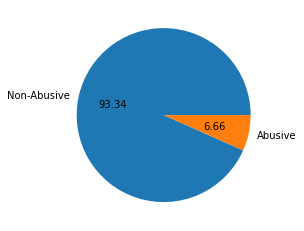

In [29]:
import matplotlib.pyplot as plt
plt.pie(email['Class'].value_counts(), labels=['Non-Abusive','Abusive'], autopct="%0.2f")
plt.show()

### data is imbalance

In [30]:
import nltk

In [31]:
!pip install nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
import warnings
warnings.filterwarnings("ignore")
email['num_characters'] = email['content'].apply(len)

In [34]:
email.head()

,content,Class,num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [35]:
## Number of words
email['num_words'] = email['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
email.head()

,content,Class,num_characters,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [37]:
email['num_sentences'] = email['content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [38]:
email.head()

,content,Class,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [39]:
email[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.321017,12.479031
std,5394.644531,818.334355,26.660055
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [40]:
## Abusive
email[email['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.696102,16.905603
std,2834.633786,590.600439,32.147667
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [41]:
## Non-Abusive
email[email['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.151560,12.163205
std,5532.160062,832.213721,26.196939
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [42]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

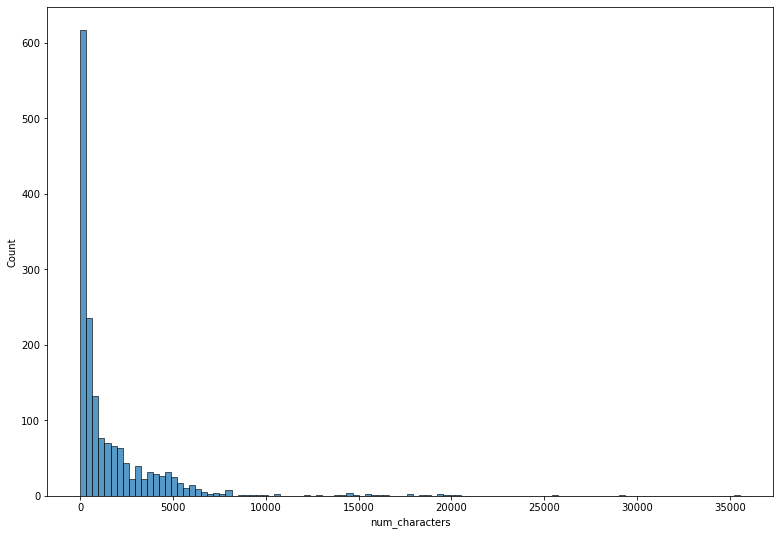

In [43]:
plt.figure(figsize=(13,9))
sns.histplot(email[email['Class'] == 0]['num_characters'])# Abusive

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

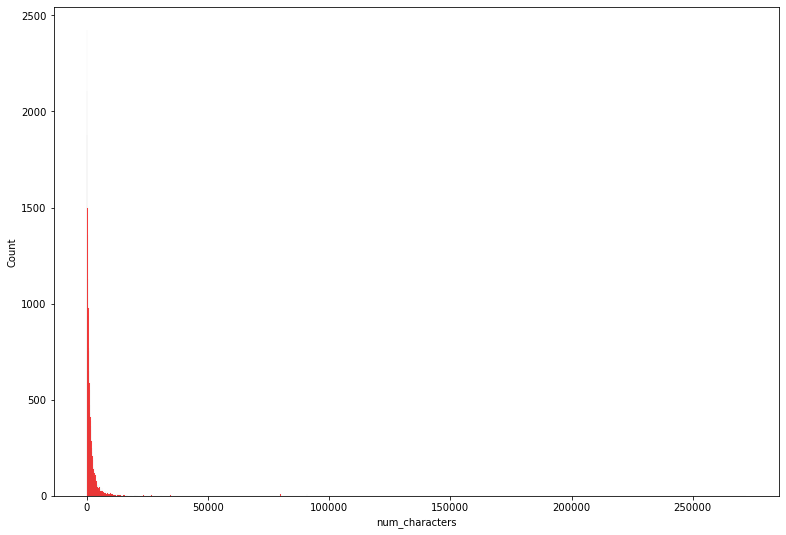

In [44]:
plt.figure(figsize=(13,9))
sns.histplot(email[email['Class'] == 1]['num_characters'],color='red')# Non-Abusive

<AxesSubplot:xlabel='num_words', ylabel='Count'>

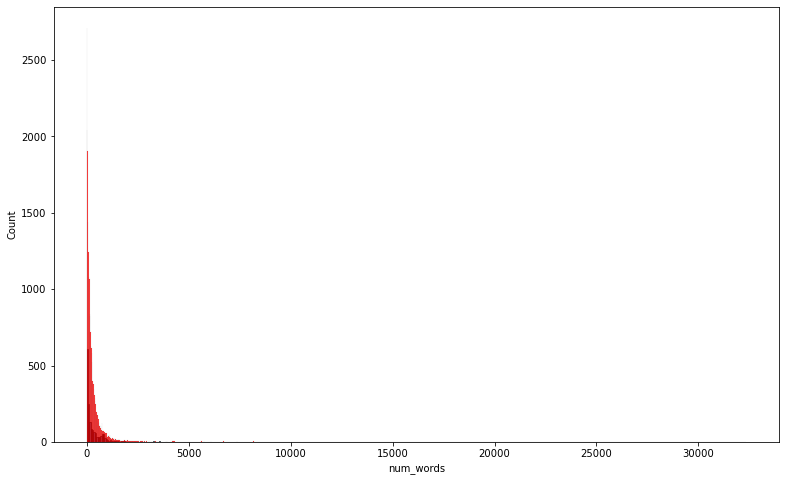

In [45]:
plt.figure(figsize=(13,8))
sns.histplot(email[email['Class'] == 0]['num_words'])# Abusive
sns.histplot(email[email['Class'] == 1]['num_words'], color='red')# Non-Abusive

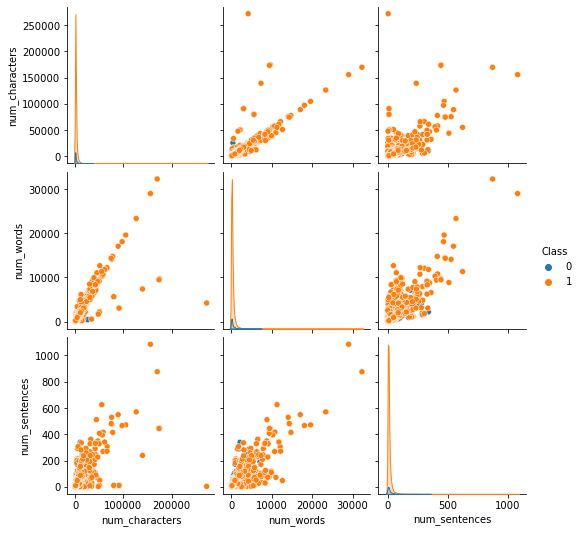

In [46]:
sns.pairplot(email,hue='Class')

<AxesSubplot:>

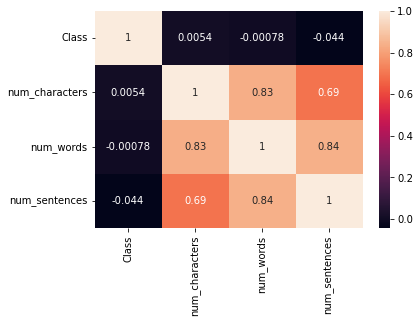

In [47]:
sns.heatmap(email.corr(),annot=True)

## Data Preprocessing

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
!pip install -U textblob

## 1) Number of Words

In [51]:
#Number of Words in single tweet
import warnings
warnings.filterwarnings("ignore")
email ['word_count'] = email ['content'].apply(lambda x: len(str(x).split(" ")))
email [['content','word_count']].head()

,content,word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,24
1,fuck you,2
2,Gentlemen:\nThe following champagne is availab...,131
3,sorry i've taken so long...just been trying to...,66
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,26


## 2) Number of Characters

In [52]:
#Number of characters in single tweet
email['char_count'] = email['content'].str.len() ## this also includes spaces
email[['content','char_count']].head()

,content,char_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,220
1,fuck you,8
2,Gentlemen:\nThe following champagne is availab...,612
3,sorry i've taken so long...just been trying to...,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,203


## 3) Average Word Length

In [53]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

email['avg_word'] = email['content'].apply(lambda x: avg_word(x))
email[['content','avg_word']].head()

,content,avg_word
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,4.648649
1,fuck you,3.500000
2,Gentlemen:\nThe following champagne is availab...,5.177778
3,sorry i've taken so long...just been trying to...,6.043478
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,4.757576


## 4) Number of Stopwords

In [54]:
stop = stopwords.words('english')

email['stopwords'] = email['content'].apply(lambda x: len([x for x in x.split() if x in stop]))
email[['content','stopwords']].head()

,content,stopwords
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,1
1,fuck you,1
2,Gentlemen:\nThe following champagne is availab...,11
3,sorry i've taken so long...just been trying to...,23
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,2


## 5) Number of Special Characters

In [55]:
email['hastags'] = email['content'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
email[['content','hastags']].head()

,content,hastags
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


## 6) Number of Numerics

In [56]:
email['numerics'] = email['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
email[['content','numerics']].head()

,content,numerics
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,1
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,21
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,3


## 7) Number of Upper Case Words

In [57]:
email['upper'] = email['content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
email[['content','upper']].head()

,content,upper
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,2
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,6
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,3


## Pre-Processing

In [58]:
email['content'] = email['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
email['content'].head()

0    eat shit john j lavorato@excelr 11/18/2000 01:...
1                                             fuck you
2    gentlemen: the following champagne is availabl...
3    sorry i've taken so long...just been trying to...
4    asshole john j lavorato@excelr 12/23/2000 10:5...
Name: content, dtype: object

## Removing Punctuation

In [59]:
email['content'] = email['content'].str.replace('[^\w\s]','')
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 p...
1                                             fuck you
2    gentlemen the following champagne is available...
3    sorry ive taken so longjust been trying to fen...
4    asshole john j lavoratoexcelr 12232000 1051 am...
Name: content, dtype: object

## Removal of Stop Words

In [60]:
stop = stopwords.words('english')
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 p...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry ive taken longjust trying fend chicks li...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

## Common Word Removal

In [61]:
freq = pd.Series(' '.join(email['content']).split()).value_counts()[:10]
freq

excelr     18487
subject    18183
please     16957
pm         16046
2001       14585
20         14037
email      13289
would      12811
message    12719
time       12278
dtype: int64

In [62]:
freq = list(freq.index)
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry ive taken longjust trying fend chicks li...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

## Rare Words Removal

In [63]:
freq = pd.Series(' '.join(email['content']).split()).value_counts()[-10:]
freq

hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key12429bmatt       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1593bbill        1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1599btrent       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1028bbrett       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key12400btony       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1471btony        1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key235213brod       1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key1310bmichael     1
hrefhttpfootball292fantasysportslinecommpelinkscriptplayersleagueeneowner455473random2125key235122bmarvin    1
r

In [64]:
freq = list(freq.index)
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry ive taken longjust trying fend chicks li...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

## Spelling Correction

In [65]:
email['content'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen following champagne available 70 app...
3    sorry give taken longus trying end checks life...
4    ashore john j lavoratoexcelr 12232000 1051 joh...
Name: content, dtype: object

## Tokenization

In [66]:
import nltk 
nltk.download('punkt')
TextBlob(email['content'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['fuck'])

## Stemming

In [67]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
email['content'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentlemen follow champagn avail 70 approxim re...
3    sorri ive taken longjust tri fend chick life s...
4    asshol john j lavoratoexcelr 12232000 1051 joh...
Name: content, dtype: object

## Lemmatization

In [68]:
from textblob import Word
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [69]:
email['content'] = email['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
email['content'].head()

0    eat shit john j lavoratoexcelr 11182000 0101 j...
1                                                 fuck
2    gentleman following champagne available 70 app...
3    sorry ive taken longjust trying fend chick lif...
4    asshole john j lavoratoexcelr 12232000 1051 jo...
Name: content, dtype: object

In [70]:
email

,content,Class,num_characters,num_words,num_sentences,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,eat shit john j lavoratoexcelr 11182000 0101 j...,0,220,44,1,24,220,4.648649,1,0,1,2
1,fuck,0,8,2,1,2,8,3.500000,1,0,0,0
2,gentleman following champagne available 70 app...,0,612,99,6,131,612,5.177778,11,0,21,0
3,sorry ive taken longjust trying fend chick lif...,0,505,163,8,66,505,6.043478,23,0,0,6
4,asshole john j lavoratoexcelr 12232000 1051 jo...,0,203,42,2,26,203,4.757576,2,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
47974,need new lead business need increased internet...,1,1523,255,12,292,1523,4.551724,67,0,13,23
47975,image image image garth brook wrapped image im...,1,1126,244,12,249,1126,4.585106,58,0,0,22
47977,imageimageimage dear smartreminders member ima...,1,892,164,9,151,892,5.627907,51,0,0,5
47980,image image image image kid rock forever image...,1,932,189,10,217,932,4.810811,44,0,0,21


# Advanced Text Processing

## N-grams

In [71]:
TextBlob(email['content'][0]).ngrams(2)

[WordList(['eat', 'shit']),
 WordList(['shit', 'john']),
 WordList(['john', 'j']),
 WordList(['j', 'lavoratoexcelr']),
 WordList(['lavoratoexcelr', '11182000']),
 WordList(['11182000', '0101']),
 WordList(['0101', 'john']),
 WordList(['john', 'arnoldhouectect']),
 WordList(['arnoldhouectect', 'cc']),
 WordList(['cc', 'football']),
 WordList(['football', 'bet']),
 WordList(['bet', '200']),
 WordList(['200', 'minn']),
 WordList(['minn', '95']),
 WordList(['95', 'buff']),
 WordList(['buff', '25']),
 WordList(['25', 'phil']),
 WordList(['phil', '7']),
 WordList(['7', 'indi']),
 WordList(['indi', '45']),
 WordList(['45', 'cinnci']),
 WordList(['cinnci', '7']),
 WordList(['7', 'det']),
 WordList(['det', '6']),
 WordList(['6', 'clev']),
 WordList(['clev', '16']),
 WordList(['16', 'den']),
 WordList(['den', '95']),
 WordList(['95', 'dall']),
 WordList(['dall', '75']),
 WordList(['75', 'jack']),
 WordList(['jack', '35'])]

## Term Frequency

### Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [72]:
tf1 = (email['content'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,fuck,1


## Inverse Document Frequency

## The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [73]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(email.shape[0]/(len(email[email['content'].str.contains(word)])))

tf1

,words,tf,idf
0,fuck,1,4.770441


## Term Frequency - Inverse Document Frequency(TF_IDF)

In [74]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,fuck,1,4.770441,4.770441


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(email['content'])
vect

<24656x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 894665 stored elements in Compressed Sparse Row format>

## Bag of Words

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(email['content'])
data_bow

<24656x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 994793 stored elements in Compressed Sparse Row format>

In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [78]:
Abusive_wc = wc.generate(email[email['Class'] == 0]['content'].str.cat(sep=" "))

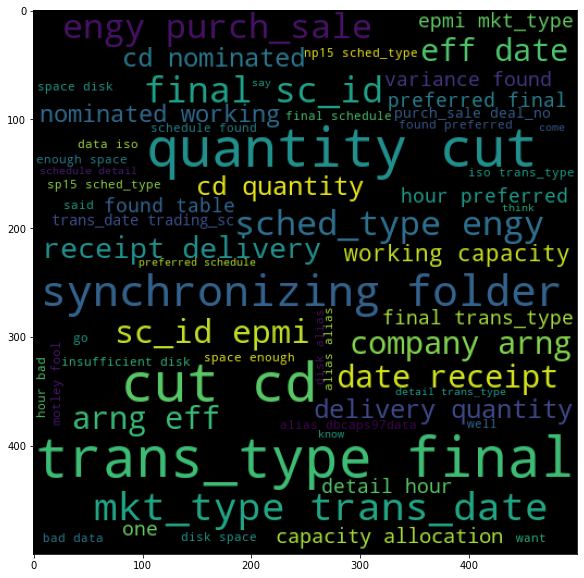

In [79]:
plt.figure(figsize=(20,10))
plt.imshow(Abusive_wc)

In [80]:
NonAbusive_wc = wc.generate(email[email['Class'] == 1]['content'].str.cat(sep=" "))

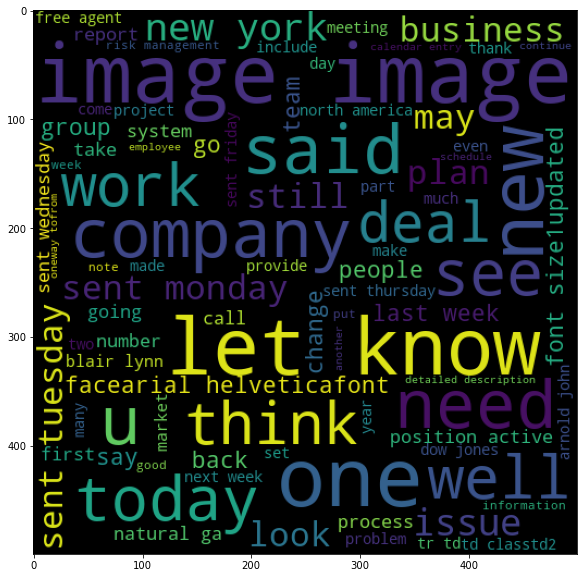

In [81]:
plt.figure(figsize=(20,10))
plt.imshow(NonAbusive_wc)

In [82]:
email.head()

,content,Class,num_characters,num_words,num_sentences,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,eat shit john j lavoratoexcelr 11182000 0101 j...,0,220,44,1,24,220,4.648649,1,0,1,2
1,fuck,0,8,2,1,2,8,3.500000,1,0,0,0
2,gentleman following champagne available 70 app...,0,612,99,6,131,612,5.177778,11,0,21,0
3,sorry ive taken longjust trying fend chick lif...,0,505,163,8,66,505,6.043478,23,0,0,6
4,asshole john j lavoratoexcelr 12232000 1051 jo...,0,203,42,2,26,203,4.757576,2,0,3,3


In [83]:

Abusive_corpus = []
for msg in email[email['Class'] ==0]['content'].tolist():
  for word in msg.split():
    Abusive_corpus.append(word)

In [84]:
Abusive_corpus

['eat',
 'shit',
 'john',
 'j',
 'lavoratoexcelr',
 '11182000',
 '0101',
 'john',
 'arnoldhouectect',
 'cc',
 'football',
 'bet',
 '200',
 'minn',
 '95',
 'buff',
 '25',
 'phil',
 '7',
 'indi',
 '45',
 'cinnci',
 '7',
 'det',
 '6',
 'clev',
 '16',
 'den',
 '95',
 'dall',
 '75',
 'jack',
 '35',
 'fuck',
 'gentleman',
 'following',
 'champagne',
 'available',
 '70',
 'approximate',
 'retail',
 'price',
 'also',
 'interest',
 'trading',
 'red',
 'wine',
 'retail',
 'price',
 'derived',
 'spec',
 'website',
 'winesearcercom',
 'wine',
 'stored',
 'temperature',
 'controlled',
 'private',
 'wine',
 'storage',
 'facility',
 'quan',
 'vintage',
 'wine',
 'retail',
 '3',
 '1990',
 'perrier',
 'jouet',
 'brut',
 'fleur',
 'de',
 'champagne',
 '110',
 '1',
 '1988',
 'piper',
 'heidsek',
 'reserve',
 '65',
 '2',
 '1990',
 'dom',
 'perignon',
 '125',
 '1',
 '1990',
 'veuve',
 'cliquot',
 'ponsardin',
 'la',
 'grande',
 'dame',
 '100',
 '1',
 '1988',
 'taittenger',
 'millesine',
 'brut',
 '85',
 '1

In [85]:
len(Abusive_corpus)

232434

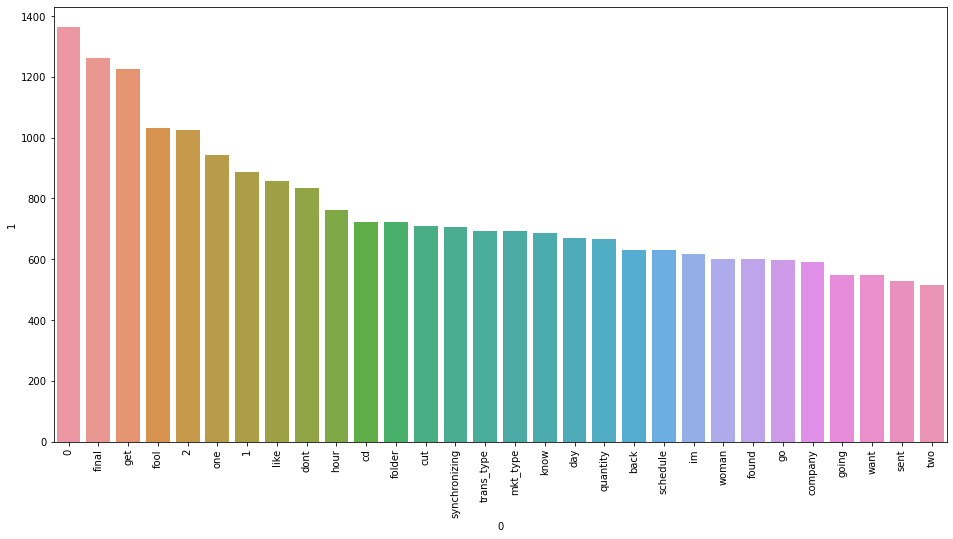

In [86]:
plt.figure(figsize=(16,8))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(Abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [87]:
NonAbusive_corpus = []
for msg in email[email['Class'] ==1]['content'].tolist():
  for word in msg.split():
    NonAbusive_corpus.append(word)

In [88]:
len(NonAbusive_corpus)

3392605

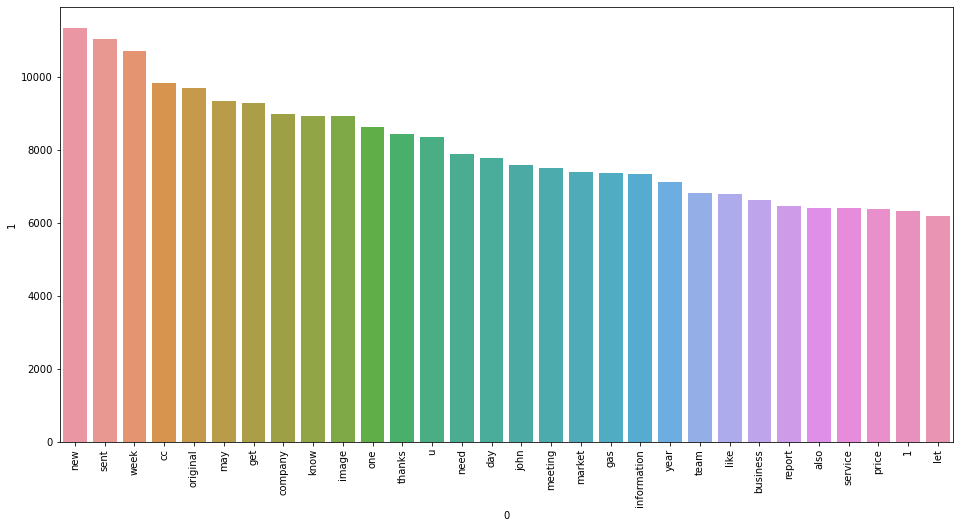

In [89]:
plt.figure(figsize=(16,8))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[0],pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Feature Extractions

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email)

In [91]:
print(vectorizer.vocabulary_)

{'content': 3, 'class': 2, 'num_characters': 5, 'num_words': 7, 'num_sentences': 6, 'word_count': 11, 'char_count': 1, 'avg_word': 0, 'stopwords': 9, 'hastags': 4, 'numerics': 8, 'upper': 10}


In [92]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

[]
[]


In [93]:
print(X.toarray().shape)

(12, 12)


In [94]:
### #### Let's see how can bigrams and trigrams can be included here
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(email)

In [95]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['avg_word', 'char_count', 'class', 'content', 'hastags', 'num_characters', 'num_sentences', 'num_words', 'numerics', 'stopwords', 'upper', 'word_count']
[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]]


## Tfidf Vectorizer

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(email)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['avg_word', 'char_count', 'class', 'content', 'hastags', 'num_characters', 'num_sentences', 'num_words', 'numerics', 'stopwords', 'upper', 'word_count']
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [97]:
!pip install imbalanced-learn

In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [99]:
email['content'] = encoder.fit_transform(email['content'])

In [100]:
X=email.drop('content',axis=1)
y=email['Class']

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(email.content,email.Class,test_size=0.20)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
from sklearn.pipeline import Pipeline

In [129]:
clf= Pipeline([
    ('Vectorizer', CountVectorizer(lowercase=False)),
    ('nb',RandomForestClassifier())
])

In [132]:
clf.fit(x_train,y_train)

TypeError: expected string or bytes-like object

In [102]:
email.Class.value_counts()

1    23014
0     1642
Name: Class, dtype: int64

In [103]:
!pip install imblearn

In [104]:
NonAbusive=email[email["Class"]==1]
Abusive=email[email["Class"]==0]

In [105]:
print(NonAbusive.shape,Abusive.shape)# here is data not balanced

(23014, 12) (1642, 12)


### Here we have to handled imbalance data by using over sampling

In [106]:
from imblearn.over_sampling import RandomOverSampler



In [107]:
res=RandomOverSampler(random_state=0)
x_res,y_res=res.fit_resample(x_train,y_train)

In [108]:
x_res.shape,y_res.shape  

((36806, 11), (36806,))

In [109]:
print(y_res.value_counts())

1    18403
0    18403
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

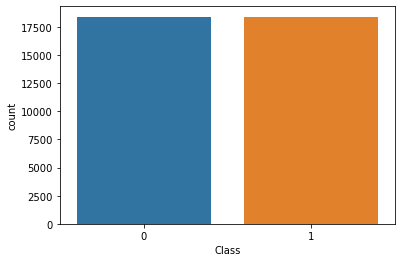

In [110]:
sns.countplot(y_res)

## smote

In [111]:
# here we are using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [112]:
from collections import Counter

In [113]:
print("Before smote :",Counter(y_train))
print("After smote :",Counter(y_train_res))

Before smote : Counter({1: 18403, 0: 1321})
After smote : Counter({1: 18403, 0: 18403})


## Model Building

## 2) Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier(n_estimators=10,max_features=3,criterion="entropy") ## Create Random forest classifer object

model_1=rdf.fit(x_res,y_res)


In [115]:
#Predict the response for test dataset
y_predict = rdf.predict(x_test)

In [116]:
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [117]:
from sklearn.metrics import classification_report

#print classification report for model
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00      4611

    accuracy                           1.00      4932
   macro avg       1.00      1.00      1.00      4932
weighted avg       1.00      1.00      1.00      4932



In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict)
print("accuracy_score : ", accuracy)
print("precision_score : ", precision)
print("recall_score : ", recall)
print("f1_score : ", f1)

accuracy_score :  1.0
precision_score :  1.0
recall_score :  1.0
f1_score :  1.0


In [119]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_predict,y_test)
cf_matrix

array([[ 321,    0],
       [   0, 4611]], dtype=int64)

In [120]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(x_train)
test_tfid_matrix = tfid.transform(x_test)

In [121]:
import pickle
pickle.dump(tfid, open('tfidf_email.pkl', 'wb'))